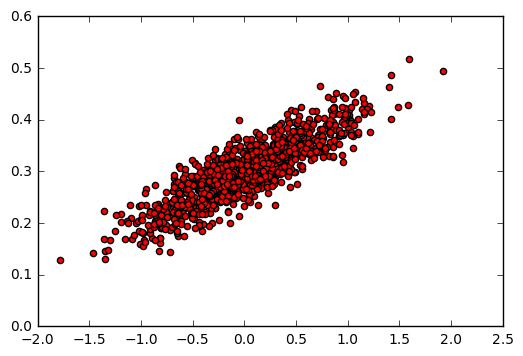

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#随机生成1000个点，围绕再y=0.1x+0.3的直线范围
num_points=1000
vectors_set=[]
for i in range(num_points):
    x1=np.random.normal(0.0,0.55)#生成一个均值事0.0，方差事0.55的高斯分布
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)#wx+b  后面的事加一些抖动
    vectors_set.append([x1,y1])

#生成一些样本
x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [3]:
#生成1维的w矩阵，取值是[-1,1]之间的随机数
W=tf.Variable(tf.random_uniform([1],-1.0,1.0),name='W')
#生成1维的b矩阵，初始值是0
b=tf.Variable(tf.zeros([1]),name='b')
#经过计算得出预估值y
y=W * x_data + b

#以预估值y和实际值y_data之间的均方差作为损失
loss=tf.reduce_mean(tf.square(y-y_data),name='loss')
#采用梯度下降法来优化参数
optimizer=tf.train.GradientDescentOptimizer(0.5)
#训练的过程就是最小化这个误差值
train=optimizer.minimize(loss,name='train')

sess=tf.Session()
#全局变量初始化
init=tf.global_variables_initializer()
sess.run(init)

#初始化的W和b是多少
print ("W=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))
#执行20次训练
for step in range(20):
    sess.run(train)
    #输出训练号的W和b
    print ("W=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))
    


W= [ 0.76452327] b= [ 0.] loss= 0.219578
W= [ 0.56912071] b= [ 0.29434633] loss= 0.0667946
W= [ 0.42900562] b= [ 0.2963258] loss= 0.0333749
W= [ 0.33065295] b= [ 0.2977452] loss= 0.0169081
W= [ 0.26161474] b= [ 0.29874149] loss= 0.00879452
W= [ 0.21315372] b= [ 0.29944086] loss= 0.00479672
W= [ 0.17913672] b= [ 0.29993176] loss= 0.00282689
W= [ 0.15525866] b= [ 0.30027637] loss= 0.00185631
W= [ 0.13849756] b= [ 0.30051827] loss= 0.00137807
W= [ 0.1267322] b= [ 0.30068806] loss= 0.00114243
W= [ 0.11847355] b= [ 0.30080724] loss= 0.00102633
W= [ 0.11267643] b= [ 0.30089089] loss= 0.000969119
W= [ 0.10860717] b= [ 0.30094963] loss= 0.000940931
W= [ 0.10575078] b= [ 0.30099085] loss= 0.000927041
W= [ 0.10374574] b= [ 0.30101979] loss= 0.000920198
W= [ 0.10233832] b= [ 0.30104008] loss= 0.000916826
W= [ 0.10135039] b= [ 0.30105436] loss= 0.000915165
W= [ 0.10065691] b= [ 0.30106434] loss= 0.000914346
W= [ 0.10017013] b= [ 0.30107138] loss= 0.000913942
W= [ 0.09982844] b= [ 0.30107632] loss=

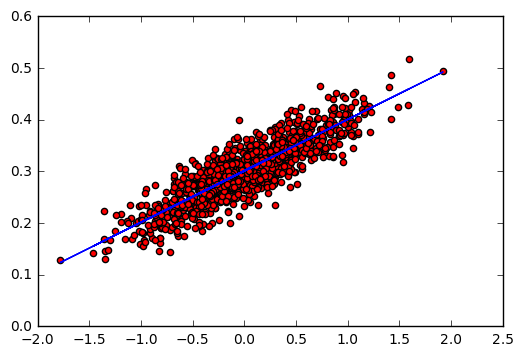

In [4]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()